# Лекция 3.  Random forest, нейронные сети

## Содержание
[3.1 Снова возвращаемся к деревьям](#3.1)  
[3.2 Random Forest](#3.2)  
[3.5 Практика](#3.5)  
[3.6 Бонусный урок - нейроэволюция](#3.6)  
[3.7 Бонусный урок - трюки в Pandas](#3.7)

## 3.1 Снова возвращаемся к деревьям<a id='3.1'></a> 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

#%config IPCompleter.greedy=True - быстрые подсказки

In [2]:
titanic_train = pd.read_csv('train.csv')

X = titanic_train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_train.Survived
 
median_age = X.groupby('Sex')['Age'].transform('median')
X = X.fillna({'Age': median_age})

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

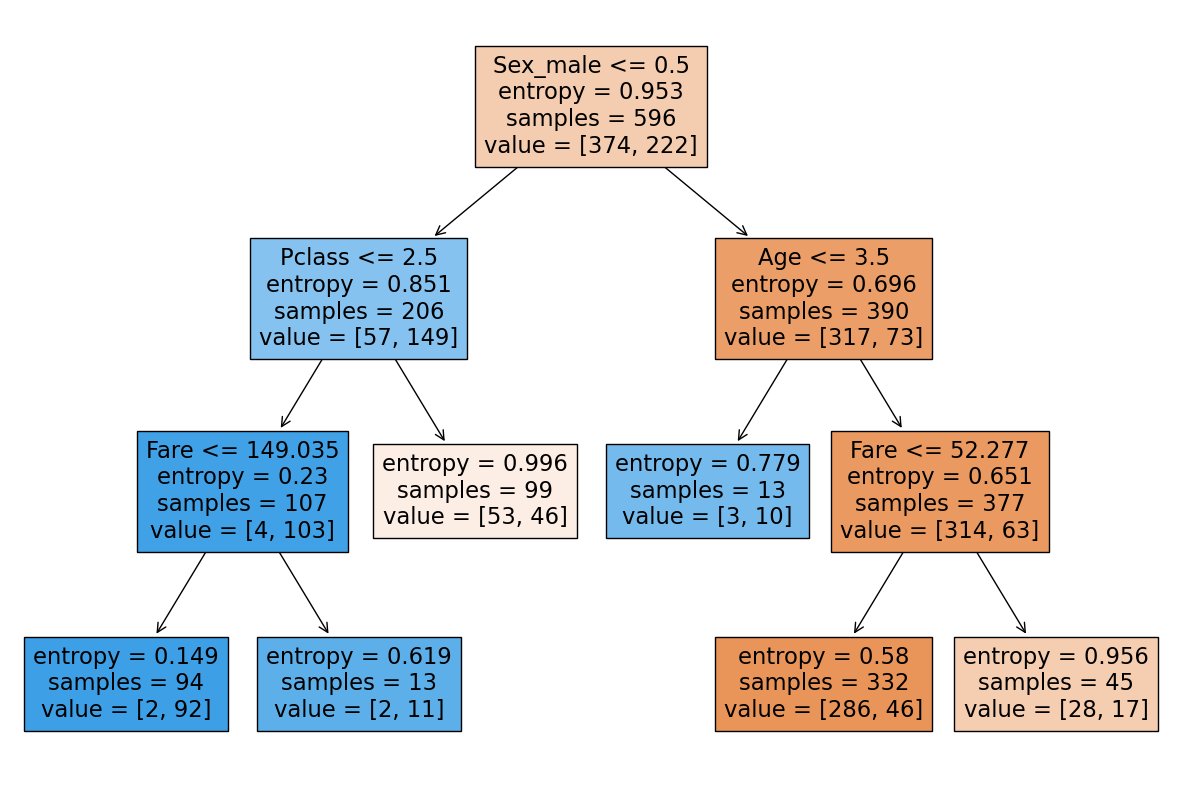

In [3]:
# min_samples_split=100 - дерево не разделяется, если имеет меньше 100 наблюдений
# min_samples_leaf=10 - дервео не разделяется, если в результате получится меньше 10 наблюдений
clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  max_depth=3,
                                  min_samples_split=100,
                                  min_samples_leaf=10)

clf.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True, feature_names=list(X))

plt.show()

In [4]:
parameters = {'max_depth': range(1,11),
              'min_samples_split': range(2, 300, 10),
              'min_samples_leaf': range(2, 300, 10)}

In [5]:
%%time
clf = tree.DecisionTreeClassifier()
search = GridSearchCV(clf, parameters, cv=5)
search.fit(X_train, y_train)

CPU times: total: 3min 2s
Wall time: 3min 5s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(2, 300, 10),
                         'min_samples_split': range(2, 300, 10)})

In [6]:
search.best_params_

{'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 32}

### Задачи

**1)**  
Соотнесите название параметра функции DecisionTreeClassifier и его значение  
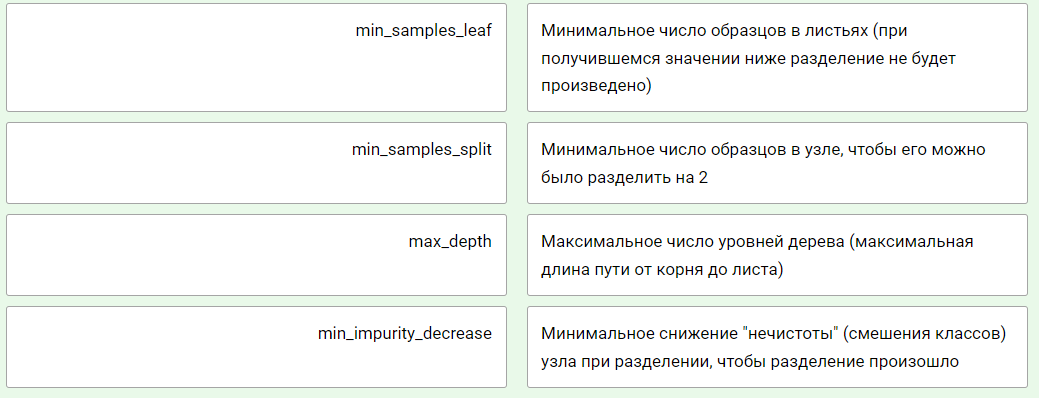

**2)**  
Отметьте верные утверждения о влиянии параметров решающего деревья на переобучение  
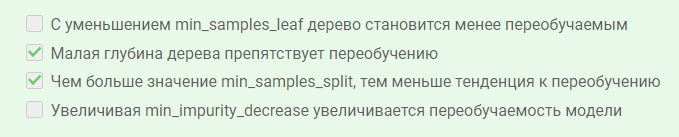

**3)**  
Укажите верные утверждения  
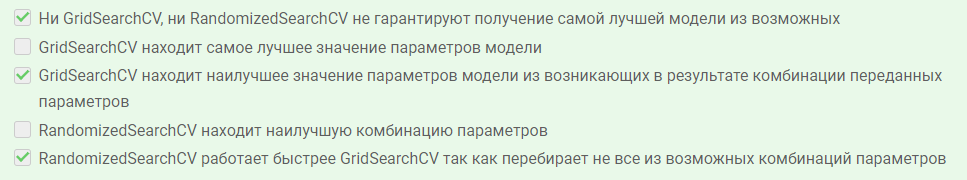

## 3.2 Random Forest<a id='3.2'></a> 

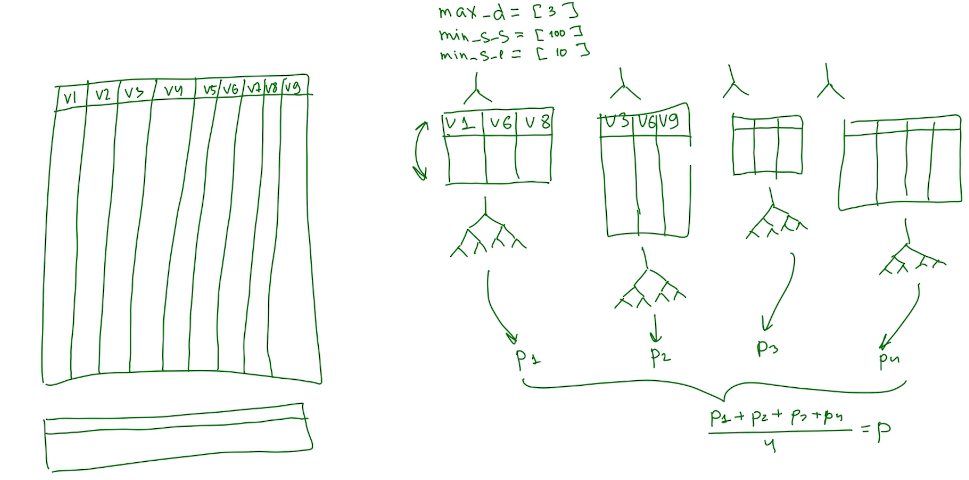

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
titanic_train = pd.read_csv('train.csv')

X = titanic_train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_train.Survived
 
median_age = X.groupby('Sex')['Age'].transform('median')
X = X.fillna({'Age': median_age})

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
clf_rf = RandomForestClassifier()

In [14]:
parameters = {'n_estimators': [10, 20, 30],
              'max_depth': range(1,11)}

In [15]:
%%time
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)
grid_search_cv_clf.fit(X_train, y_train)

CPU times: total: 5.48 s
Wall time: 5.52 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'n_estimators': [10, 20, 30]})

In [16]:
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 10}

In [17]:
best_clf = grid_search_cv_clf.best_estimator_

In [18]:
best_clf.score(X_test, y_test)

0.8033898305084746

In [19]:
feature_importances = best_clf.feature_importances_

feature_importances_df = pd.DataFrame({'features':list(X_train),
                                       'feature_importances': feature_importances})

feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
5,Sex_female,0.206749
4,Fare,0.202059
6,Sex_male,0.193541
1,Age,0.147541
0,Pclass,0.116732
2,SibSp,0.044545
3,Parch,0.035582
9,Embarked_S,0.030906
7,Embarked_C,0.014261
8,Embarked_Q,0.008086


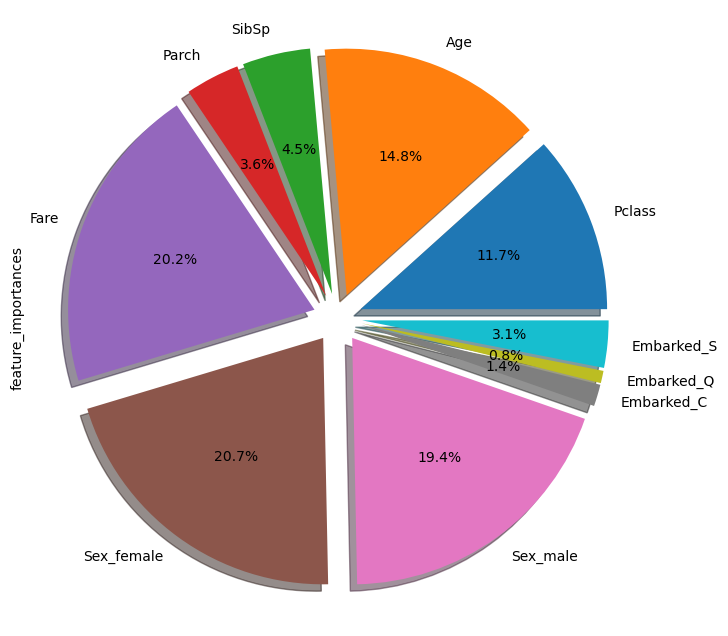

In [20]:
feature_importances_df.plot.pie(
                        explode=[0.1]*len(X_train.columns),
                        labels = feature_importances_df.features,
                        y = 'feature_importances',
                        autopct='%1.1f%%',
                        shadow=True,
                        legend=False,
                        figsize=(8, 8));

### Задачи

**1)**  
Отметьте верные утверждения о  Random Forest  
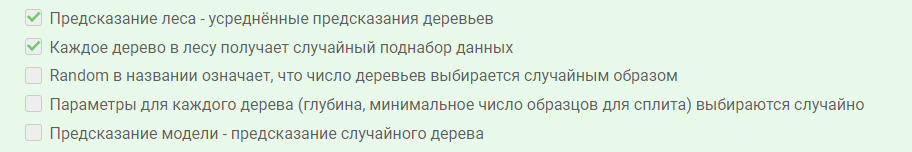

**2)**  
Разминочная задачка - создайте модель RandomForestClassifier с 15 деревьями и максимальной глубиной равной 5 уровням, поместите её в переменную rf. Обучите модель на данных x_train и y_train, предскажите класс для наблюдений в x_test и поместите его в переменную predictions.  

In [21]:
rf = RandomForestClassifier(n_estimators=15, max_depth=5)
predictions = rf.fit(X_train, y_train).predict(X_test)
predictions

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

**3)**  
Воспользуемся данными о сердечных заболеваниях и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).
Чтобы получить такой же график, как в правильном варианте ответа, сделайте:

In [22]:
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)

In [24]:
# https://github.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/blob/master/heart-disease.csv#L1
heart_disease_df = pd.read_csv('Data/Лекция 3/heart-disease.csv')
heart_disease_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [25]:
X = heart_disease_df.drop('target', axis=1)
y = heart_disease_df.target

In [26]:
rf.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [27]:
feature_importances = rf.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X),
                                       'importances': feature_importances})

feature_importances_df = feature_importances_df.sort_values('importances')
feature_importances_df

,features,importances
5,fbs,0.008493
6,restecg,0.018583
1,sex,0.039990
0,age,0.043441
8,exang,0.048079
3,trestbps,0.053569
4,chol,0.056887
10,slope,0.069208
11,ca,0.077048
9,oldpeak,0.116645


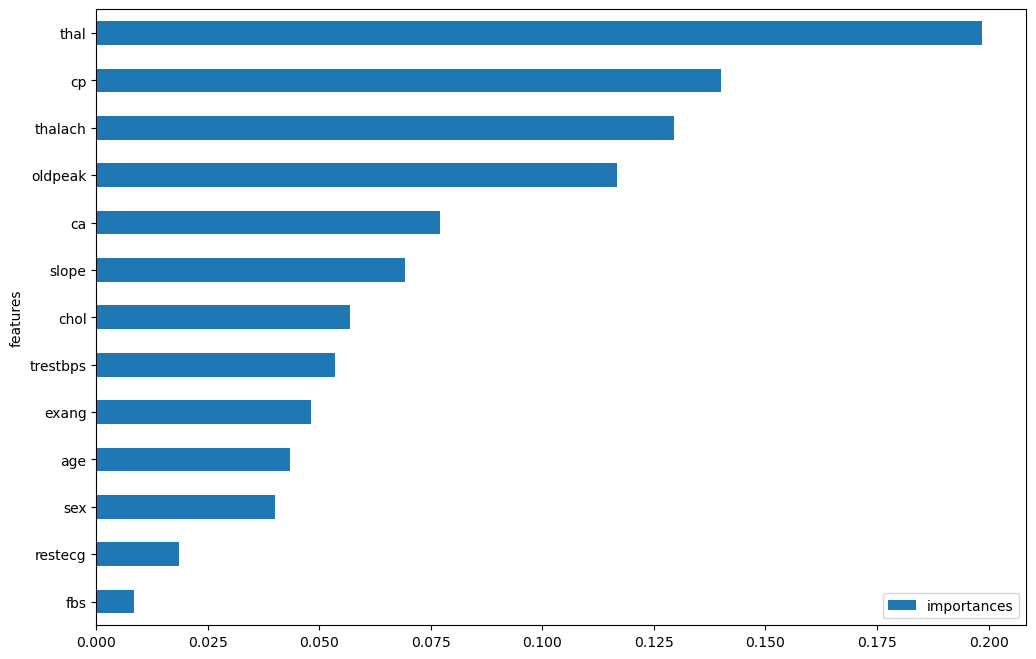

In [28]:
feature_importances_df.set_index('features').plot(kind='barh', figsize=(12, 8))
plt.show()

## 3.5 Практика<a id='3.5'></a> 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

Данные о съедобности грибов для части заданий. Взяты [отсюда](https://www.kaggle.com/uciml/mushroom-classification#mushrooms.csv), все категориальные переменные были закодированы числами для простоты.

In [2]:
mush_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')
print(mush_df.shape)
mush_df.head()

(6093, 23)


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


### Задания

**1)**  
Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. Передайте в GridSearchCV модель с указанием random_state

RandomForestClassifier(random_state=0)
Параметры для выбора -

* n_estimators: от 10 до 50 с шагом 10;
* max_depth: от 1 до 12 с шагом 2;
* min_samples_leaf: от 1 до 7;
* min_samples_split: от 2 до 9 с шагом 2;
* Укажите cv=3. 

Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.

Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?

In [3]:
X = mush_df.iloc[:, :-1]
y = mush_df['class']

In [4]:
rf_clf = RandomForestClassifier(random_state=0)

In [5]:
parameters = {'n_estimators': np.arange(10, 51, 10),
              'max_depth': np.arange(1, 13, 2),
              'min_samples_leaf': np.arange(1, 8),
              'min_samples_split': np.arange(2, 10, 2)}
cv = 3

In [6]:
%%time
# verbose - визуализация темпа обучения (от 1 до 3, чем больше цифра, теми больше информации)
grid_search_cv_clf = GridSearchCV(rf_clf, parameters, cv=cv, verbose=3, n_jobs=-1)
grid_search_cv_clf.fit(X, y)
grid_search_cv_clf.best_params_

Fitting 3 folds for each of 840 candidates, totalling 2520 fits
CPU times: total: 4.5 s
Wall time: 1min 52s


{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

**2)**  
Выберите правильные утверждения о важности фичей для нашего классификатора:  
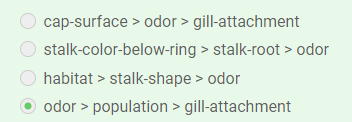

In [7]:
# влияние фичей
best_clf = grid_search_cv_clf.best_estimator_
best_clf.feature_importances_

array([0.00257742, 0.00312957, 0.02177298, 0.07010933, 0.18837641,
       0.        , 0.0808402 , 0.06846076, 0.10386114, 0.00756262,
       0.10379322, 0.03180155, 0.04829594, 0.01768932, 0.00625335,
       0.        , 0.0108812 , 0.0139101 , 0.07072612, 0.08356419,
       0.04378343, 0.02261118])

<Axes: ylabel='features'>

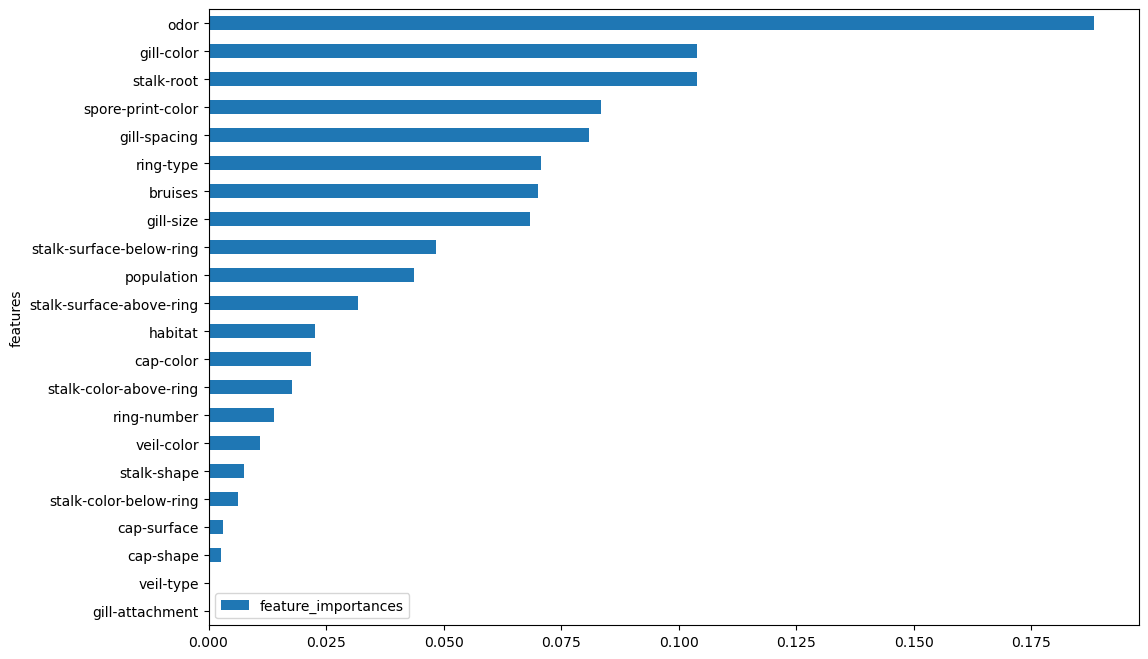

In [8]:
# визуализация
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X),
                                       'feature_importances': feature_importances})
feature_importances_df = feature_importances_df.sort_values('feature_importances', ascending=True)

feature_importances_df.set_index('features').plot(kind='barh', figsize=(12, 8))

In [9]:
feature_importances_df[(feature_importances_df['features'] == 'population') |  \
                       (feature_importances_df['features'] == 'gill-attachment') |  \
                       (feature_importances_df['features'] == 'odor')]  \
                      .sort_values('feature_importances', ascending=False)

,features,feature_importances
4,odor,0.188376
20,population,0.043783
5,gill-attachment,0.000000


**3)**  
Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! Предскажите съедобность этих данных грибов и напишите в ответ число несъедобных грибов (класс равен 1).

In [10]:
mush_test_X = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')
print(mush_test_X.shape)
mush_test_X.head()

(2031, 22)


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [11]:
# число несъедобных грибов (класс равен 1)
y_pred = best_clf.predict(mush_test_X)
y_pred.sum()

976

**4)**  
Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам, (воспользуйтесь паролем из предыдущего задания, чтобы открыть их). Выберите из предложенных вариантов правильный.



In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
mush_test_y = pd.read_csv('Data/Лекция 3/testing_y_mush.csv')
print(mush_test_y.shape)
mush_test_y.head(3)

(2031, 1)


,class
0,0
1,0
2,1


In [14]:
# Вариант 1
cm = confusion_matrix(mush_test_y, y_pred)
cm

array([[1055,    0],
       [   0,  976]], dtype=int64)

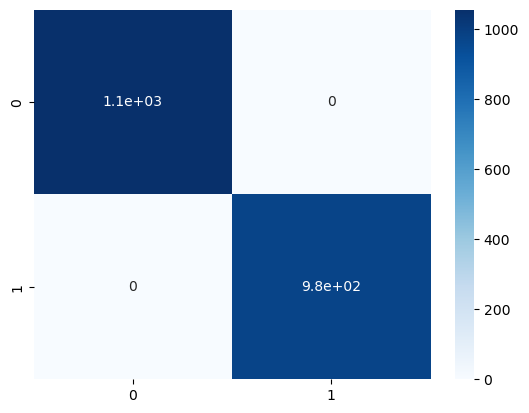

In [15]:
# Вариант 2
sns.heatmap(cm, annot=True, cmap="Blues")
plt.show()

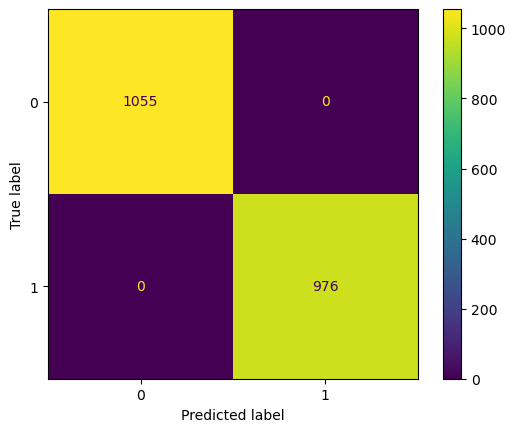

In [16]:
# Вариант 3
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(cm, display_labels=best_clf.classes_)
disp.plot()

plt.show()

**5)**  
Перейдём к следующему датасэту.

На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для новых поступающих данных. Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

От вашего ответа зависит судьба человечества!

In [30]:
train_bugs = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')
print(train_bugs.shape)
train_bugs.head()

(500, 7)


,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [31]:
X = train_bugs.iloc[:, 1:]
y = train_bugs['class']

In [32]:
test_bugs = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')
print(test_bugs.shape)
test_bugs.head()

(1500, 6)


,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [33]:
rf_clf = RandomForestClassifier()

In [34]:
parameters = {'n_estimators': np.arange(10, 51, 10),
              'max_depth': np.arange(1, 11, 2),
              'min_samples_leaf': np.arange(2, 11, 2),
              'min_samples_split': np.arange(2, 11, 2)}
cv = 5

In [35]:
%%time
# verbose - визуализация темпа обучения (от 1 до 3, чем больше цифра, теми больше информации)
grid_search_cv_clf = GridSearchCV(rf_clf, parameters, cv=cv, verbose=3, n_jobs=-1)
grid_search_cv_clf.fit(X, y)
grid_search_cv_clf.best_params_

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
CPU times: total: 3.09 s
Wall time: 1min 27s


{'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 10}

In [36]:
best_clf = grid_search_cv_clf.best_estimator_

In [37]:
pred = best_clf.predict(test_bugs)

y_test = pd.Series(pred)
y_test.value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

**6)**  
Какая переменная оказалась самой важной для классифицирования кораблей?

In [38]:
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X),
                                       'feature_importances': feature_importances})
feature_importances_df = feature_importances_df.sort_values('feature_importances', ascending=False)
feature_importances_df.head(3)

,features,feature_importances
5,volume,0.373200
3,brightness,0.300013
2,speed,0.197155


**7)**  
Благодаря вашим стараниям войска захватчиков были разгромлены, но война ещё не окончена! Вас повысили и перевели на новое направление (новые должности - новые задачи) - теперь нужно выявлять опасные регионы космоса, где могут находиться жукеры.

Проанализируйте имеющиеся данные об опасности разных регионов космоса и укажите наиболее вероятные причины угрозы

In [39]:
dangerous_space_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')
print(dangerous_space_df.shape)
dangerous_space_df.head()

(100000, 8)


,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [40]:
dangerous_space_df.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000


<Axes: >

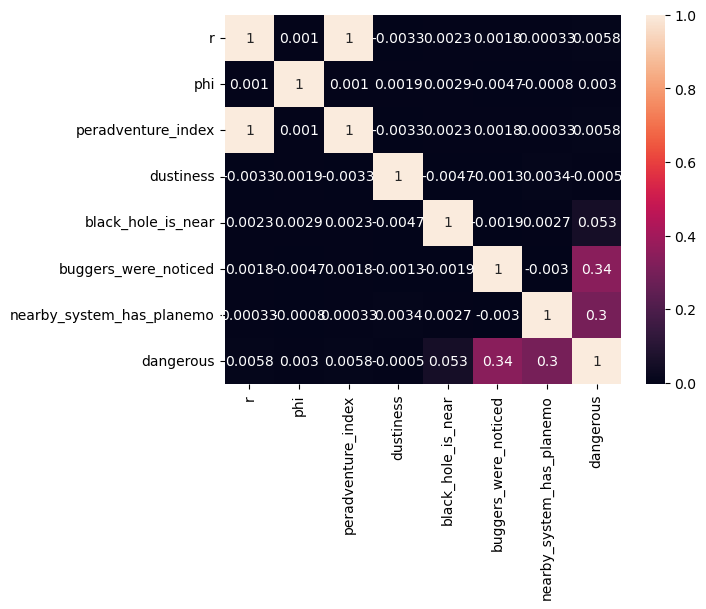

In [41]:
sns.heatmap(dangerous_space_df.corr(), annot=True)

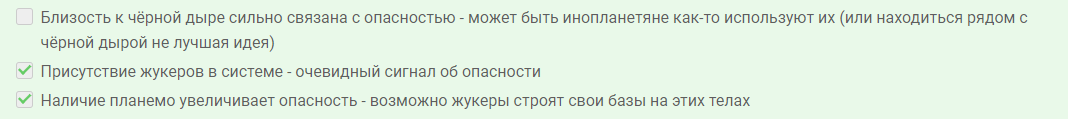

## 3.6 Бонусный урок - нейроэволюция<a id='3.6'></a> 

[Описание NEAT и иллюстрация его использования на модели, играющей в Flappy Bird](https://web.archive.org/web/20181204121810/medium.com/datadriveninvestor/neuroevolution-neat-algorithm-and-my-neat-b83c5174d8b0)  
[Видео с игрой моделей, эволюционирующих по NEAT'у](https://www.youtube.com/watch?v=aeWmdojEJf0&feature=youtu.be)  
[Исходная статья](http://nn.cs.utexas.edu/downloads/papers/stanley.ec02.pdf)  
[Решение задачки с Flappy Bird](https://habr.com/en/post/217645/)  
[Видео с применением алгоритма](https://www.youtube.com/watch?v=-nYo_sThziU&feature=youtu.be)

## 3.7 Бонусный урок - трюки в Pandas<a id='3.7'></a> 

In [15]:
import pandas as pd
import numpy as np

In [16]:
movie_df = pd.read_csv('Data\Лекция 3\movie_metadata.csv')
print(movie_df.shape)
movie_df.head()

(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [17]:
genres = movie_df[['movie_title', 'genres']]
genres.head()

,movie_title,genres
0,Avatar,Action|Adventure|Fantasy|Sci-Fi
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy
2,Spectre,Action|Adventure|Thriller
3,The Dark Knight Rises,Action|Thriller
4,Star Wars: Episode VII - The Force Awakens ...,Documentary


### Применение функции через цикл

In [18]:
for i in genres:
    print(i)

movie_title
genres


In [19]:
for i in genres.columns:
    print(i)

movie_title
genres


In [20]:
for row in genres.values:
    for value in row:
        print(value)

Avatar 
Action|Adventure|Fantasy|Sci-Fi
Pirates of the Caribbean: At World's End 
Action|Adventure|Fantasy
Spectre 
Action|Adventure|Thriller
The Dark Knight Rises 
Action|Thriller
Star Wars: Episode VII - The Force Awakens             
Documentary
John Carter 
Action|Adventure|Sci-Fi
Spider-Man 3 
Action|Adventure|Romance
Tangled 
Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance
Avengers: Age of Ultron 
Action|Adventure|Sci-Fi
Harry Potter and the Half-Blood Prince 
Adventure|Family|Fantasy|Mystery
Batman v Superman: Dawn of Justice 
Action|Adventure|Sci-Fi
Superman Returns 
Action|Adventure|Sci-Fi
Quantum of Solace 
Action|Adventure
Pirates of the Caribbean: Dead Man's Chest 
Action|Adventure|Fantasy
The Lone Ranger 
Action|Adventure|Western
Man of Steel 
Action|Adventure|Fantasy|Sci-Fi
The Chronicles of Narnia: Prince Caspian 
Action|Adventure|Family|Fantasy
The Avengers 
Action|Adventure|Sci-Fi
Pirates of the Caribbean: On Stranger Tides 
Action|Adventure|Fantasy
Men in Bl

In [21]:
def reversator(value):
    return value[::-1]

In [22]:
for row in genres.values:
    for value in row:
        print(reversator(value))

 ratavA
iF-icS|ysatnaF|erutnevdA|noitcA
 dnE s'dlroW tA :naebbiraC eht fo setariP
ysatnaF|erutnevdA|noitcA
 ertcepS
rellirhT|erutnevdA|noitcA
 sesiR thginK kraD ehT
rellirhT|noitcA
             snekawA ecroF ehT - IIV edosipE :sraW ratS
yratnemucoD
 retraC nhoJ
iF-icS|erutnevdA|noitcA
 3 naM-redipS
ecnamoR|erutnevdA|noitcA
 delgnaT
ecnamoR|lacisuM|ysatnaF|ylimaF|ydemoC|noitaminA|erutnevdA
 nortlU fo egA :sregnevA
iF-icS|erutnevdA|noitcA
 ecnirP doolB-flaH eht dna rettoP yrraH
yretsyM|ysatnaF|ylimaF|erutnevdA
 ecitsuJ fo nwaD :namrepuS v namtaB
iF-icS|erutnevdA|noitcA
 snruteR namrepuS
iF-icS|erutnevdA|noitcA
 ecaloS fo mutnauQ
erutnevdA|noitcA
 tsehC s'naM daeD :naebbiraC eht fo setariP
ysatnaF|erutnevdA|noitcA
 regnaR enoL ehT
nretseW|erutnevdA|noitcA
 leetS fo naM
iF-icS|ysatnaF|erutnevdA|noitcA
 naipsaC ecnirP :ainraN fo selcinorhC ehT
ysatnaF|ylimaF|erutnevdA|noitcA
 sregnevA ehT
iF-icS|erutnevdA|noitcA
 sediT regnartS nO :naebbiraC eht fo setariP
ysatnaF|erutnevdA|noitcA
 3 kcalB 

### iterrows(), items()

In [23]:
for i, row in genres.iterrows():
    print(row.map(reversator))

movie_title                             ratavA
genres         iF-icS|ysatnaF|erutnevdA|noitcA
Name: 0, dtype: object
movie_title     dnE s'dlroW tA :naebbiraC eht fo setariP
genres                          ysatnaF|erutnevdA|noitcA
Name: 1, dtype: object
movie_title                      ertcepS
genres         rellirhT|erutnevdA|noitcA
Name: 2, dtype: object
movie_title     sesiR thginK kraD ehT
genres                rellirhT|noitcA
Name: 3, dtype: object
movie_title                 snekawA ecroF ehT - IIV edosipE :...
genres                                               yratnemucoD
Name: 4, dtype: object
movie_title                retraC nhoJ
genres         iF-icS|erutnevdA|noitcA
Name: 5, dtype: object
movie_title                3 naM-redipS
genres         ecnamoR|erutnevdA|noitcA
Name: 6, dtype: object
movie_title                                              delgnaT
genres         ecnamoR|lacisuM|ysatnaF|ylimaF|ydemoC|noitamin...
Name: 7, dtype: object
movie_title     nortlU fo egA :s

movie_title                                             tserevE
genres         rellirhT|tropS|yrotsiH|amarD|yhpargoiB|erutnevdA
Name: 693, dtype: object
movie_title     reredruM a fo yrotS ehT :emufreP
genres                       ysatnaF|amarD|emirC
Name: 694, dtype: object
movie_title     rebmemdloG ni srewoP nitsuA
genres                  emirC|ydemoC|noitcA
Name: 695, dtype: object
movie_title                                yoB ortsA
genres         iF-icS|ylimaF|ydemoC|noitaminA|noitcA
Name: 696, dtype: object
movie_title                kraP cissaruJ
genres         rellirhT|iF-icS|erutnevdA
Name: 697, dtype: object
movie_title                                 praE ttayW
genres         nretseW|amarD|emirC|yhpargoiB|erutnevdA
Name: 698, dtype: object
movie_title       regnaD tneserP dna raelC
genres         rellirhT|amarD|emirC|noitcA
Name: 699, dtype: object
movie_title                      edalB nogarD
genres         yrotsiH|amarD|erutnevdA|noitcA
Name: 700, dtype: object
movie_titl

movie_title                    htraE tenalP morf epacsE
genres         iF-icS|ylimaF|ydemoC|noitaminA|erutnevdA
Name: 1235, dtype: object
movie_title                         otpylacopA
genres         rellirhT|amarD|erutnevdA|noitcA
Name: 1236, dtype: object
movie_title         sthgilyaD gniviL ehT
genres         rellirhT|erutnevdA|noitcA
Name: 1237, dtype: object
movie_title                           srotaderP
genres         rellirhT|iF-icS|erutnevdA|noitcA
Name: 1238, dtype: object
movie_title            selgaE lageL
genres         ecnamoR|emirC|ydemoC
Name: 1239, dtype: object
movie_title       wodniW terceS
genres         rellirhT|yretsyM
Name: 1240, dtype: object
movie_title           esuoH ekaL ehT
genres         ecnamoR|ysatnaF|amarD
Name: 1241, dtype: object
movie_title           yeK notelekS ehT
genres         rellirhT|yretsyM|rorroH
Name: 1242, dtype: object
movie_title     neerG yhtomiT fo efiL ddO ehT
genres            ysatnaF|ylimaF|amarD|ydemoC
Name: 1243, dtype: object
mo

movie_title                        ssendnilB
genres         rellirhT|iF-icS|yretsyM|amarD
Name: 1997, dtype: object
movie_title                         enyaRdoolB
genres         rorroH|ysatnaF|erutnevdA|noitcA
Name: 1998, dtype: object
movie_title         eganraC
genres         amarD|ydemoC
Name: 1999, dtype: object
movie_title            seiL hturT eht erehW
genres         rellirhT|yretsyM|amarD|emirC
Name: 2000, dtype: object
movie_title     yawA sdlroW :lieloS ud euqriC
genres                                ysatnaF
Name: 2001, dtype: object
movie_title           stimiL tuohtiW
genres         tropS|amarD|yhpargoiB
Name: 2002, dtype: object
movie_title     selleW nosrO dna eM
genres                        amarD
Name: 2003, dtype: object
movie_title                 reffO tseB ehT
genres         ecnamoR|yretsyM|amarD|emirC
Name: 2004, dtype: object
movie_title     snaelrO weN llaC fo troP :tnanetueiL daB
genres                                       amarD|emirC
Name: 2005, dtype: object


Name: 2834, dtype: object
movie_title        nawS kcalB
genres         rellirhT|amarD
Name: 2835, dtype: object
movie_title                         poCoboR
genres         rellirhT|iF-icS|emirC|noitcA
Name: 2836, dtype: object
movie_title     II traP :rehtafdoG ehT
genres                     amarD|emirC
Name: 2837, dtype: object
movie_title     ecnaD tsaL eht evaS
genres          ecnamoR|cisuM|amarD
Name: 2838, dtype: object
movie_title     retsaM maerD ehT :4 teertS mlE no eramthgiN A
genres                                rellirhT|rorroH|ysatnaF
Name: 2839, dtype: object
movie_title     nevaeH morf selcariM
genres                         amarD
Name: 2840, dtype: object
movie_title     ?raC yM s'erehW ,eduD
genres                 yretsyM|ydemoC
Name: 2841, dtype: object
movie_title                             snuG gnuoY
genres         nretseW|rellirhT|amarD|emirC|noitcA
Name: 2842, dtype: object
movie_title     tnecniV .tS
genres         amarD|ydemoC
Name: 2843, dtype: object
movie_titl

movie_title                            txiwT
genres         yretsyM|rorroH|ysatnaF|ydemoC
Name: 3537, dtype: object
movie_title                    neeuQ wonS
genres         ylimaF|noitaminA|erutnevdA
Name: 3538, dtype: object
movie_title     evaC dehtooT waS eht fo dnegeL ehT :4 agemO d...
genres         rellirhT|ysatnaF|ylimaF|amarD|ydemoC|noitaminA...
Name: 3539, dtype: object
movie_title     rediR elaP
genres             nretseW
Name: 3540, dtype: object
movie_title               hturT fo krA ehT :etagratS
genres         iF-icS|ysatnaF|amarD|erutnevdA|noitcA
Name: 3541, dtype: object
movie_title     desufnoC dna dezaD
genres                      ydemoC
Name: 3542, dtype: object
movie_title                        2 lacisuM loohcS hgiH
genres         ecnamoR|lacisuM|cisuM|ylimaF|amarD|ydemoC
Name: 3543, dtype: object
movie_title     raeB a dna srevoL owT
genres                  ecnamoR|amarD
Name: 3544, dtype: object
movie_title     seitivitcA lanimirC
genres         rellirhT|amarD|em

movie_title                           nrutaS ot yenruoJ
genres         iF-icS|ydemoC|noitaminA|erutnevdA|noitcA
Name: 4164, dtype: object
movie_title              feeR s'navonoD
genres         ecnamoR|ydemoC|erutnevdA
Name: 4165, dtype: object
movie_title       sserD ehT
genres         amarD|ydemoC
Name: 4166, dtype: object
movie_title              eoJ demaN yuG A
genres         raW|ecnamoR|ysatnaF|amarD
Name: 4167, dtype: object
movie_title     selddaS gnizalB
genres           nretseW|ydemoC
Name: 4168, dtype: object
movie_title     retpahC laniF ehT :ht31 eht yadirF
genres                             rellirhT|rorroH
Name: 4169, dtype: object
movie_title      adI
genres         amarD
Name: 4170, dtype: object
movie_title          eciruaM
genres         ecnamoR|amarD
Name: 4171, dtype: object
movie_title     eugaeL reeB
genres         tropS|ydemoC
Name: 4172, dtype: object
movie_title     efiW s'tuanortsA ehT
genres         rellirhT|iF-icS|amarD
Name: 4173, dtype: object
movie_title   

movie_title     stuO eht nO
genres                amarD
Name: 4870, dtype: object
movie_title     seirotS nugtohS
genres           rellirhT|amarD
Name: 4871, dtype: object
movie_title                maxE
genres         rellirhT|yretsyM
Name: 4872, dtype: object
movie_title     emiT fo sregniF ykcitS ehT
genres                              iF-icS
Name: 4873, dtype: object
movie_title     lacisuM loohcS yadnuS
genres                  lacisuM|amarD
Name: 4874, dtype: object
movie_title     tsuR
genres         amarD
Name: 4875, dtype: object
movie_title                            knI
genres         iF-icS|ysatnaF|amarD|noitcA
Name: 4876, dtype: object
movie_title     ynnuB samtsirhC ehT
genres                 ylimaF|amarD
Name: 4877, dtype: object
movie_title     elpoeP suseJ
genres          trohS|ydemoC
Name: 4878, dtype: object
movie_title      ylfrettuB
genres         amarD|emirC
Name: 4879, dtype: object
movie_title      dediviDnU
genres         yratnemucoD
Name: 4880, dtype: object
mo

In [24]:
for i, col in genres.items():
    print(col.map(reversator))

0                                                  ratavA
1                dnE s'dlroW tA :naebbiraC eht fo setariP
2                                                 ertcepS
3                                   sesiR thginK kraD ehT
4                    snekawA ecroF ehT - IIV edosipE :...
                              ...                        
5038                              derevileD delaeS dengiS
5039                                        gniwolloF ehT
5040                                 tnasaelP oS eugalP A
5041                                     gnillaC iahgnahS
5042                                    werD htiw etaD yM
Name: movie_title, Length: 5043, dtype: object
0       iF-icS|ysatnaF|erutnevdA|noitcA
1              ysatnaF|erutnevdA|noitcA
2             rellirhT|erutnevdA|noitcA
3                       rellirhT|noitcA
4                           yratnemucoD
                     ...               
5038                       amarD|ydemoC
5039       rellirhT|yretsyM|amarD|e

### applymap(), apply(), transform()

In [25]:
budget = movie_df[['budget', 'duration']]
budget.head()

,budget,duration
0,237000000.0,178.0
1,300000000.0,169.0
2,245000000.0,148.0
3,250000000.0,164.0
4,NaN,NaN


In [26]:
budget.applymap(lambda x: x + 1)

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN
...,...,...
5038,NaN,88.0
5039,NaN,44.0
5040,1401.0,77.0
5041,NaN,101.0


In [27]:
budget.apply(np.mean, axis=0)

budget      3.975262e+07
duration    1.072011e+02
dtype: float64

In [28]:
budget.apply(lambda x: x+1)

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN
...,...,...
5038,NaN,88.0
5039,NaN,44.0
5040,1401.0,77.0
5041,NaN,101.0


In [29]:
budget.transform(lambda x: x+1)

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN
...,...,...
5038,NaN,88.0
5039,NaN,44.0
5040,1401.0,77.0
5041,NaN,101.0


In [30]:
def mm(col):
    return np.mean(col) + 1

In [31]:
%%time
budget.apply(mm)

CPU times: total: 0 ns
Wall time: 2 ms


budget      3.975262e+07
duration    1.082011e+02
dtype: float64

In [32]:
budget.applymap(mm)

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN
...,...,...
5038,NaN,88.0
5039,NaN,44.0
5040,1401.0,77.0
5041,NaN,101.0


In [33]:
budget.transform(mm)

ValueError: Function did not transform

In [36]:
%%timeit
budget.dropna().mean() + 1

1.06 ms ± 76 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [37]:
%%timeit
# операции на array более быстрые, чем на Series
np.mean(budget['budget'].dropna().values)

107 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Timeseries

In [40]:
stock = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/amzn_stock.csv', 
                   index_col=0, 
                   parse_dates=True)
print(stock.shape)
stock.head()

(1896, 5)


,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [41]:
stock.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17'],
              dtype='datetime64[ns]', name='Date', length=1896, freq=None)

In [42]:
# выбор строк по дате
stock.loc['2010-02':'2011-03']

,Open,High,Low,Close,Volume
Date,,,,,
2010-02-01,123.18,124.86,113.82,118.87,37774317
2010-02-02,118.79,118.98,114.40,118.12,23084986
2010-02-03,117.12,119.61,116.56,119.10,12409012
2010-02-04,118.64,120.33,115.74,115.94,12783912
2010-02-05,115.88,117.65,114.10,117.39,11027086
...,...,...,...,...,...
2011-03-25,171.64,173.49,170.30,170.98,4294302
2011-03-28,171.80,172.50,169.25,169.35,3400936
2011-03-29,170.73,174.84,170.07,174.62,4887443


### resample()

In [43]:
# разделение дней на 4 части
stock.resample('7h').asfreq().head(8)

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00,136.25,136.61,133.14,133.9,7600543.0
2010-01-04 07:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 14:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 21:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-05 04:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-05 11:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-05 18:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-06 01:00:00,NaN,NaN,NaN,NaN,NaN


In [44]:
# группирование данных по 1 неделе
stock.resample('1w').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-10,133.3700,134.564,130.8860,132.872,8900385.80
2010-01-17,129.5660,130.472,126.9940,128.252,10756782.40
2010-01-24,126.5475,128.255,123.7925,125.360,9883903.25
2010-01-31,123.5780,125.528,120.5840,122.796,18627194.20
2010-02-07,118.7220,120.286,114.9240,117.884,19415862.60
...,...,...,...,...,...
2017-06-25,1003.6940,1007.236,993.9580,999.006,3435057.40
2017-07-02,987.3720,994.062,974.0140,981.004,3719885.20
2017-07-09,967.1325,976.000,958.6025,967.240,3116265.75


### rolling()

In [45]:
# скользящее окно
stock.rolling(3).mean() # среднее значение по исходной строке и еще 2 строкам идушим перед ней

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06
...,...,...,...,...,...
2017-07-11,982.516667,991.846667,978.786667,989.786667,3.057460e+06
2017-07-12,992.883333,1001.326667,988.440000,999.036667,3.379189e+06
2017-07-13,999.423333,1003.806667,992.573333,1000.423333,3.157356e+06


In [46]:
stock.rolling(3, min_periods=1).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06
...,...,...,...,...,...
2017-07-11,982.516667,991.846667,978.786667,989.786667,3.057460e+06
2017-07-12,992.883333,1001.326667,988.440000,999.036667,3.379189e+06
2017-07-13,999.423333,1003.806667,992.573333,1000.423333,3.157356e+06


### expanding()

In [47]:
# расширяющееся окно
stock.expanding().mean() # во второй строке среднее по 1 и 2 строке, в 3 по 1, 2 и 3 итд.
# последняя запись - среднее по всей колонке

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,134.072500,134.785000,131.350000,132.710000,8.667025e+06
2010-01-08,133.370000,134.564000,130.886000,132.872000,8.900386e+06
...,...,...,...,...,...
2017-07-11,376.749450,380.480122,372.654524,376.793171,4.534246e+06
2017-07-12,377.079033,380.811907,372.984923,377.125827,4.533757e+06
2017-07-13,377.410364,381.142460,373.313812,377.455026,4.532884e+06


In [48]:
# расширяющееся окно
stock.expanding(3).mean() 

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,134.072500,134.785000,131.350000,132.710000,8.667025e+06
2010-01-08,133.370000,134.564000,130.886000,132.872000,8.900386e+06
...,...,...,...,...,...
2017-07-11,376.749450,380.480122,372.654524,376.793171,4.534246e+06
2017-07-12,377.079033,380.811907,372.984923,377.125827,4.533757e+06
2017-07-13,377.410364,381.142460,373.313812,377.455026,4.532884e+06


### ewm()

In [49]:
# экпоненциально-взвешенное окно
stock.ewm(alpha=0.7).mean() 

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.080769,135.740769,132.116923,134.507692,8.566630e+06
2010-01-06,134.454317,135.013597,131.781007,132.883453,7.569757e+06
2010-01-07,132.729323,133.112682,129.677262,130.848553,1.001179e+07
2010-01-08,131.207098,133.510772,129.223075,132.723121,9.886915e+06
...,...,...,...,...,...
2017-07-11,989.084881,995.142613,982.059585,992.890941,3.089057e+06
2017-07-12,997.180464,1004.527784,993.287876,1002.424282,3.452719e+06
2017-07-13,1002.388139,1006.174335,995.116363,1001.168285,3.052354e+06


### Сглаживание кривых

<Axes: xlabel='Date'>

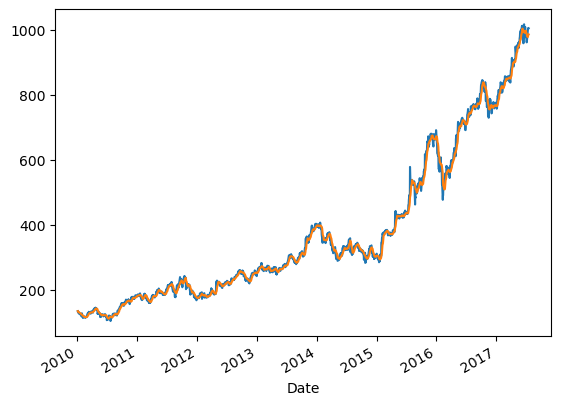

In [50]:
stock['Open'].plot()

ns = stock['Open'].rolling(10, min_periods=1).mean()
ns.plot()

<Axes: xlabel='Date'>

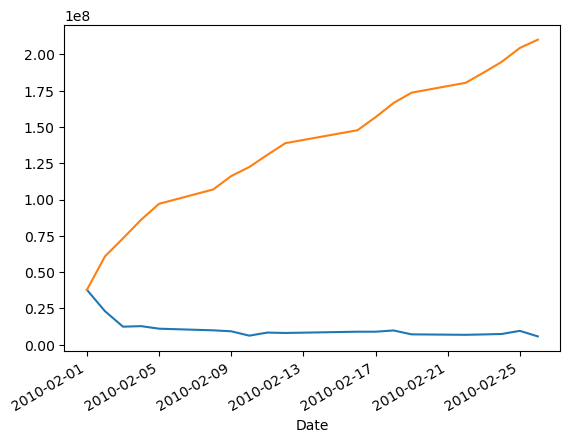

In [51]:
# объём торгов по дням
stock.loc['2010-02'].Volume.plot()

# сумма объёмов за этот и предыдущие дни
stock.loc['2010-02'].Volume.expanding().sum().plot()

### Обращение к дням

In [52]:
stock.index.weekday

Int64Index([0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
            ...
            0, 2, 3, 4, 0, 1, 2, 3, 4, 0],
           dtype='int64', name='Date', length=1896)

In [53]:
stock.index.day_name()

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       ...
       'Monday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype='object', name='Date', length=1896)

In [54]:
stock.index.day_name().value_counts()

Wednesday    390
Tuesday      389
Thursday     382
Friday       380
Monday       355
Name: Date, dtype: int64

In [55]:
# номер дня в году
stock.index.dayofyear

Int64Index([  4,   5,   6,   7,   8,  11,  12,  13,  14,  15,
            ...
            184, 186, 187, 188, 191, 192, 193, 194, 195, 198],
           dtype='int64', name='Date', length=1896)

In [56]:
# номер недели в году
stock.index.isocalendar().week

Date
2010-01-04     1
2010-01-05     1
2010-01-06     1
2010-01-07     1
2010-01-08     1
              ..
2017-07-11    28
2017-07-12    28
2017-07-13    28
2017-07-14    28
2017-07-17    29
Name: week, Length: 1896, dtype: UInt32

In [57]:
stock.index.isocalendar().day

Date
2010-01-04    1
2010-01-05    2
2010-01-06    3
2010-01-07    4
2010-01-08    5
             ..
2017-07-11    2
2017-07-12    3
2017-07-13    4
2017-07-14    5
2017-07-17    1
Name: day, Length: 1896, dtype: UInt32

### Задания

**1)**  
Расставьте способы взять среднее значение по скорости выполнения сверху вниз - наверху самый быстрый.
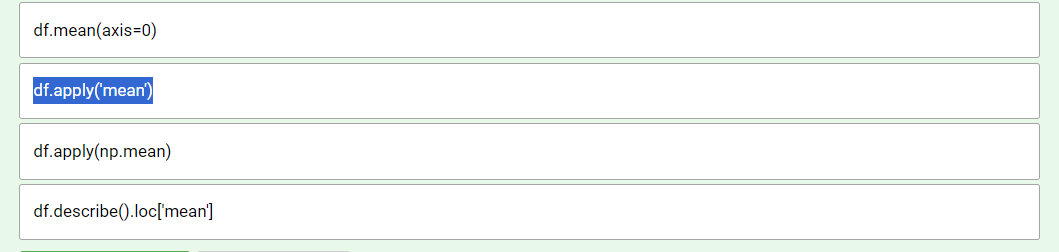

In [58]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv')

In [59]:
%%timeit
df.describe().loc['mean']

10.7 ms ± 1.74 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [60]:
%%timeit
df.apply(np.mean)

755 µs ± 37.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [61]:
%%timeit
df.mean(axis=0)

380 µs ± 35 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [62]:
%%timeit
df.apply('mean')

546 µs ± 70.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


**2)**  
К вам попали наблюдения о числе перелетающих на зимовку стрижей, представленные в виде пандасовской серии wintering. В каждой ячейке указано число пролетевших птиц за этот день. Посчитайте с помощью expanding окна количество всех перелетевших птиц за всё время до данного и поместите в переменную total_birds.

In [63]:
wintering = pd.Series(data = {'2018-04-30': 12,
                              '2018-05-01': 11,
                              '2018-05-02': 12,
                              '2018-05-03': 13,
                              '2018-05-04': 13,
                              '2018-05-05': 21,
                              '2018-05-06': 28,
                              '2018-05-07': 21,
                              '2018-05-08': 12,
                              '2018-05-09': 12,
                              '2018-05-10': 31})
wintering

2018-04-30    12
2018-05-01    11
2018-05-02    12
2018-05-03    13
2018-05-04    13
2018-05-05    21
2018-05-06    28
2018-05-07    21
2018-05-08    12
2018-05-09    12
2018-05-10    31
dtype: int64

In [64]:
total_birds = wintering.expanding().sum()
total_birds

2018-04-30     12.0
2018-05-01     23.0
2018-05-02     35.0
2018-05-03     48.0
2018-05-04     61.0
2018-05-05     82.0
2018-05-06    110.0
2018-05-07    131.0
2018-05-08    143.0
2018-05-09    155.0
2018-05-10    186.0
dtype: float64

**3)**  
Соотнесите строчку кода и её эффект, df содержит DatetimeIndex  
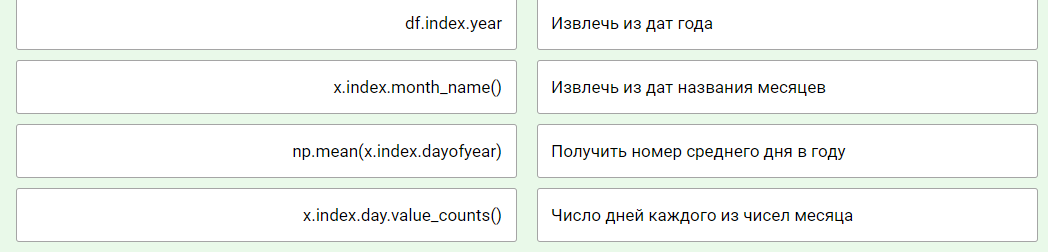